# THERA BANK CREDIT CARDS Project

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards.

### Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank
5. Use some of the feature engineering and RandomsearchCV techniques reviewed this week

# Import libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cdata = pd.read_csv('/content/drive/MyDrive/Atlanta/Week 4 Training/Weekend 4 Project/BankChurners.csv')

View data:

In [ ]:
cdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Change column names to make dataframe easier to read:

In [ ]:
cdata.columns = [
                 'Client ID','Status','Age','Gender','Dependents','Education','Marital Status','Income','Card Type','Months Since Opening',
                 'Products Count','Months Inactive','Contacts Count','Credit Limit','Revolving Balance','Open To Buy','Transaction Amount Change',
                 'Transaction Amount','Transaction Count','Transaction Count Change','Card Utilization Ratio'
                 ]

In [ ]:
cdata.head()

,Client ID,Status,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount Change,Transaction Amount,Transaction Count,Transaction Count Change,Card Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory Data Analysis

In [ ]:
sum(cdata.duplicated())

0

In [ ]:
round(cdata.quantile(0.25), 1)

Client ID                    713036770.5
Age                                 41.0
Dependents                           1.0
Months Since Opening                31.0
Products Count                       3.0
Months Inactive                      2.0
Contacts Count                       2.0
Credit Limit                      2555.0
Revolving Balance                  359.0
Open To Buy                       1324.5
Transaction Amount Change            0.6
Transaction Amount                2155.5
Transaction Count                   45.0
Transaction Count Change             0.6
Card Utilization Ratio               0.0
Name: 0.25, dtype: float64

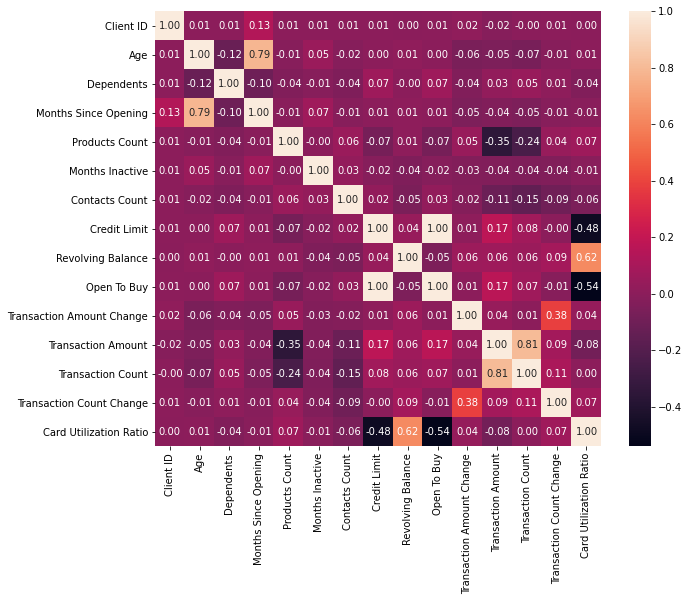

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cdata.corr(), annot=True, fmt='.2f')

In [ ]:
print(cdata.info())
print()
print(cdata.shape)
print()
print(cdata.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Client ID                  10127 non-null  int64  
 1   Status                     10127 non-null  object 
 2   Age                        10127 non-null  int64  
 3   Gender                     10127 non-null  object 
 4   Dependents                 10127 non-null  int64  
 5   Education                  10127 non-null  object 
 6   Marital Status             10127 non-null  object 
 7   Income                     10127 non-null  object 
 8   Card Type                  10127 non-null  object 
 9   Months Since Opening       10127 non-null  int64  
 10  Products Count             10127 non-null  int64  
 11  Months Inactive            10127 non-null  int64  
 12  Contacts Count             10127 non-null  int64  
 13  Credit Limit               10127 non-null  flo

In [ ]:
round(cdata.describe(), 2)

,Client ID,Age,Dependents,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount Change,Transaction Amount,Transaction Count,Transaction Count Change,Card Utilization Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


In [ ]:
numerical = cdata.describe().columns
categorical = cdata.drop(cdata.describe().columns, axis=1).columns

In [ ]:
for col in categorical:
  print(round(cdata[col].value_counts(normalize=True), 4) * 100)
  print()

Existing Customer    83.93
Attrited Customer    16.07
Name: Status, dtype: float64

F    52.91
M    47.09
Name: Gender, dtype: float64

Graduate         30.89
High School      19.88
Unknown          15.00
Uneducated       14.68
College          10.00
Post-Graduate     5.10
Doctorate         4.45
Name: Education, dtype: float64

Married     46.28
Single      38.94
Unknown      7.40
Divorced     7.39
Name: Marital Status, dtype: float64

Less than $40K    35.16
$40K - $60K       17.68
$80K - $120K      15.16
$60K - $80K       13.84
Unknown           10.98
$120K +            7.18
Name: Income, dtype: float64

Blue        93.18
Silver       5.48
Gold         1.15
Platinum     0.20
Name: Card Type, dtype: float64



It look like we have some imbalances to work with. There are much more:
* Existing than Attrited customers
* Blue card than any other card

We will have to figure out how to balance the dataset later. Another issue: we have a few columns with a well-represented "Unknown" category

# Dealing With Missing Data

### Existing Customers With Missing Data

In [ ]:
unknown_data_customers = cdata[
                               (cdata['Education'] == 'Unknown') |
                               (cdata['Marital Status'] == 'Unknown') |
                               (cdata['Income'] == 'Unknown')
                              ]

print('Number of customers with some form of missing data:', len(unknown_data_customers))
print('Percentage:', round(len(unknown_data_customers) * 100 / len(cdata), 2))

Number of customers with some form of missing data: 3046
Percentage: 30.08


This is quite a large portion of our dataset. Let's see how our existing and attriting customers are represented within this subgroup.

In [ ]:
# Finding the number of customers within this subgroup who have attrited accounts
num_unknown_attriting = len(unknown_data_customers[unknown_data_customers['Status'] == 'Attrited Customer'])
num_unknown_existing = len(unknown_data_customers[unknown_data_customers['Status'] == 'Existing Customer'])

print('Number of attriting customers within:', num_unknown_attriting)
print( 'Percentage within customers with unknown data:', round(num_unknown_attriting * 100 / len(unknown_data_customers), 2) )

Number of attriting customers within: 514
Percentage within customers with unknown data: 16.87


The subgroup with some kind of missing data follows the general population in terms of attrition rate, right around 16%. Since we need to balance our dataset anyways, let's see what happens to our dataset if we hypothetically drop all Existing customers who have some kind of unknown data while keeping the under-represented Attrited group:

In [ ]:
print('ORIGINAL DATA *******************')
print('Number of Existing:', 
      sum(cdata['Status'] == 'Existing Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Existing Customer') * 100 / len(cdata), 2) )
      )
print('Number of Attriting:', 
      sum(cdata['Status'] == 'Attrited Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Attrited Customer') * 100 / len(cdata), 2) )
      )

print()

print('HYPOTHETICAL DROP DATA **********')
print('Number of Existing:', 
      sum(cdata['Status'] == 'Existing Customer') - num_unknown_existing,
      '({}%)'.format( round((sum(cdata['Status'] == 'Existing Customer') - num_unknown_existing) * 100 / (len(cdata) - num_unknown_existing), 2) )
      )
print('Number of Attriting:', 
      sum(cdata['Status'] == 'Attrited Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Attrited Customer') * 100 / (len(cdata) - num_unknown_existing), 2) )
      )

ORIGINAL DATA *******************
Number of Existing: 8500 (83.93%)
Number of Attriting: 1627 (16.07%)

HYPOTHETICAL DROP DATA **********
Number of Existing: 5968 (78.58%)
Number of Attriting: 1627 (21.42%)


This does indeed help us balance our dataset more towards an even split between Attriting and Existing customers. Let's go ahead and do it. It'll help us to slightly undersample our majority class.

In [ ]:
to_drop = unknown_data_customers[unknown_data_customers['Status'] == 'Existing Customer'].index
cdata.drop(to_drop, inplace=True)

# A new look at our distributions with majority unknowns dropped
for col in categorical:
  print(round(cdata[col].value_counts(normalize=True), 4) * 100)
  print()

Existing Customer    78.58
Attrited Customer    21.42
Name: Status, dtype: float64

M    50.9
F    49.1
Name: Gender, dtype: float64

Graduate         35.18
High School      22.67
Uneducated       16.52
College          11.40
Post-Graduate     5.87
Doctorate         4.98
Unknown           3.37
Name: Education, dtype: float64

Married     49.30
Single      41.13
Divorced     7.87
Unknown      1.70
Name: Marital Status, dtype: float64

Less than $40K    38.59
$40K - $60K       19.47
$80K - $120K      16.52
$60K - $80K       15.10
$120K +            7.85
Unknown            2.46
Name: Income, dtype: float64

Blue        93.26
Silver       5.40
Gold         1.17
Platinum     0.17
Name: Card Type, dtype: float64



### Attriting Customers With Missing Data

We will use K-Nearset-Neighbors Imputation. Prep data for KNN Imputer:

In [ ]:
# Drop Client ID because it is an identification column, and drop Status because all of our missing customers are attriting (1:1 correlation)
idata = cdata.drop(['Client ID', 'Status'], axis=1)

# Save our target variable to reattach later
target = cdata['Status']

# Replace categories with numerical values for the KNN Imputer
idata['Education'].replace({'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}, inplace=True)
idata['Marital Status'].replace({'Single': 1, 'Married': 2, 'Divorced' :3}, inplace=True)
idata['Income'].replace({'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}, inplace=True)
idata['Card Type'].replace({'Blue' : 1, 'Silver' : 2, 'Gold' : 3, 'Platinum' : 4}, inplace=True)
idata['Gender'].replace({'M' : 1, 'F' : 0}, inplace=True)

idata.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount Change,Transaction Amount,Transaction Count,Transaction Count Change,Card Utilization Ratio
0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,44,1,2,4,2,2,1,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [ ]:
# Dropping strictly for KNN Imputer reasons, to avoid rounding of these ratios
knn_data = idata.drop(['Transaction Amount Change', 'Transaction Count Change', 'Card Utilization Ratio'], axis=1)

# Save ratios to reattach after KNN Imputation
amt_change = idata['Transaction Amount Change']
cnt_change = idata['Transaction Count Change']
c_util_ratio = idata['Card Utilization Ratio']

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count
0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1144,42
1,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1291,33
2,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,1887,20
4,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,816,28
5,44,1,2,4,2,2,1,36,3,1,2,4010.0,1247,2763.0,1088,24


In [ ]:
# Replace Unknowns with Null Values for KNN Imputer
knn_data.replace({'Education': {'Unknown': None},
                  'Marital Status': {'Unknown': None},
                  'Income': {'Unknown': None}
                  }, inplace=True)
knn_data.isnull().sum()

Age                       0
Gender                    0
Dependents                0
Education               256
Marital Status          129
Income                  187
Card Type                 0
Months Since Opening      0
Products Count            0
Months Inactive           0
Contacts Count            0
Credit Limit              0
Revolving Balance         0
Open To Buy               0
Transaction Amount        0
Transaction Count         0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=43)
knn_data = pd.DataFrame(np.round(imputer.fit_transform(knn_data)), columns=knn_data.columns)

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count
0,45.0,1.0,3.0,2.0,2.0,3.0,1.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1144.0,42.0
1,49.0,0.0,5.0,4.0,1.0,1.0,1.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1291.0,33.0
2,51.0,1.0,3.0,4.0,2.0,4.0,1.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,1887.0,20.0
3,40.0,1.0,3.0,1.0,2.0,3.0,1.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,816.0,28.0
4,44.0,1.0,2.0,4.0,2.0,2.0,1.0,36.0,3.0,1.0,2.0,4010.0,1247.0,2763.0,1088.0,24.0


In [ ]:
knn_data.isnull().sum()

Age                     0
Gender                  0
Dependents              0
Education               0
Marital Status          0
Income                  0
Card Type               0
Months Since Opening    0
Products Count          0
Months Inactive         0
Contacts Count          0
Credit Limit            0
Revolving Balance       0
Open To Buy             0
Transaction Amount      0
Transaction Count       0
dtype: int64

In [ ]:
# Rejoin the newly imputed data with the ratio columns dropped for imputation purposes
knn_data['Transaction Amount Change'] = list(amt_change)
knn_data['Transaction Count Change'] = list(cnt_change)
knn_data['Card Utilization Ratio'] = list(c_util_ratio)

# Rejoin the Status target variable
knn_data['Status'] = list(target)

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count,Transaction Amount Change,Transaction Count Change,Card Utilization Ratio,Status
0,45.0,1.0,3.0,2.0,2.0,3.0,1.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1144.0,42.0,1.335,1.625,0.061,Existing Customer
1,49.0,0.0,5.0,4.0,1.0,1.0,1.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1291.0,33.0,1.541,3.714,0.105,Existing Customer
2,51.0,1.0,3.0,4.0,2.0,4.0,1.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,1887.0,20.0,2.594,2.333,0.000,Existing Customer
3,40.0,1.0,3.0,1.0,2.0,3.0,1.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,816.0,28.0,2.175,2.500,0.000,Existing Customer
4,44.0,1.0,2.0,4.0,2.0,2.0,1.0,36.0,3.0,1.0,2.0,4010.0,1247.0,2763.0,1088.0,24.0,1.376,0.846,0.311,Existing Customer


In [ ]:
knn_data.isnull().sum()

Age                          0
Gender                       0
Dependents                   0
Education                    0
Marital Status               0
Income                       0
Card Type                    0
Months Since Opening         0
Products Count               0
Months Inactive              0
Contacts Count               0
Credit Limit                 0
Revolving Balance            0
Open To Buy                  0
Transaction Amount           0
Transaction Count            0
Transaction Amount Change    0
Transaction Count Change     0
Card Utilization Ratio       0
Status                       0
dtype: int64

In [ ]:
knn_data['Status'].replace({'Existing Customer' : 0, 'Attrited Customer' : 1}, inplace=True)

### New Categorical Distributions

In [ ]:
for col in categorical:
  print(round(knn_data[col].value_counts(normalize=True), 4) * 100)
  print()

0    78.58
1    21.42
Name: Status, dtype: float64

1.0    50.9
0.0    49.1
Name: Gender, dtype: float64

4.0    35.33
2.0    22.69
1.0    16.52
3.0    14.61
5.0     5.87
6.0     4.98
Name: Education, dtype: float64

2.0    50.82
1.0    41.30
3.0     7.87
Name: Marital Status, dtype: float64

1.0    38.80
2.0    20.78
4.0    16.83
3.0    15.75
5.0     7.85
Name: Income, dtype: float64

1.0    93.26
2.0     5.40
3.0     1.17
4.0     0.17
Name: Card Type, dtype: float64



In [ ]:
categorical

,Gender,Education,Marital Status,Income,Card Type
0,1.0,2.0,2.0,3.0,1.0
1,0.0,4.0,1.0,1.0,1.0
2,1.0,4.0,2.0,4.0,1.0
3,1.0,1.0,2.0,3.0,1.0
4,1.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...
7590,1.0,4.0,1.0,2.0,1.0
7591,1.0,3.0,3.0,2.0,1.0
7592,0.0,2.0,2.0,1.0,1.0
7593,1.0,4.0,2.0,2.0,1.0


We can see that our KNN Imputer did a good job of separating the Unknown values into different bins. The new distribution is much better than one we would have obtained using simple mean or mode imputation.

# Numerical Univariate Analysis

In [ ]:
numerical_small = knn_data[['Dependents', 'Products Count', 'Months Inactive', 'Contacts Count']]
numerical_large = knn_data[['Age', 'Months Since Opening', 'Credit Limit', 'Revolving Balance', 'Open To Buy', 'Transaction Amount', 'Transaction Count']]
numerical_ratio = knn_data[['Transaction Amount Change', 'Transaction Count Change', 'Card Utilization Ratio']]

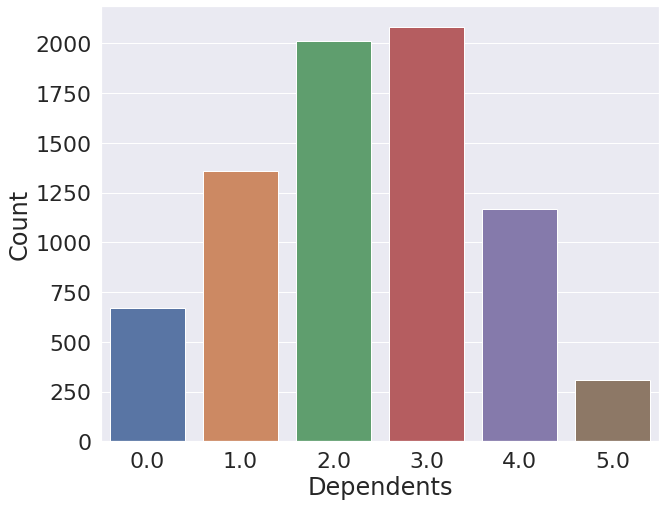

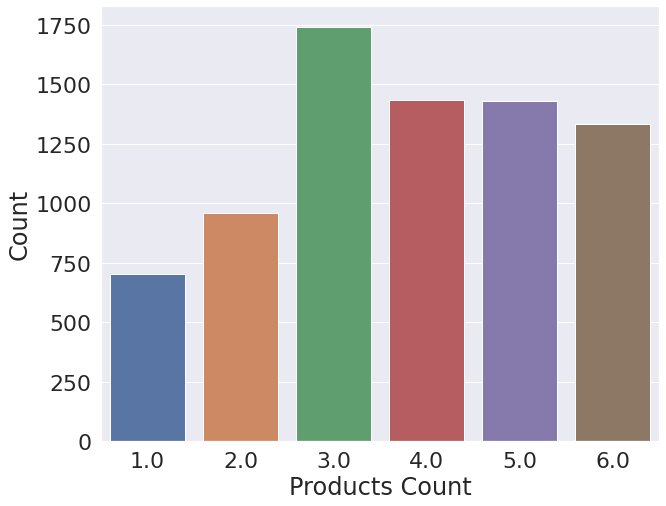

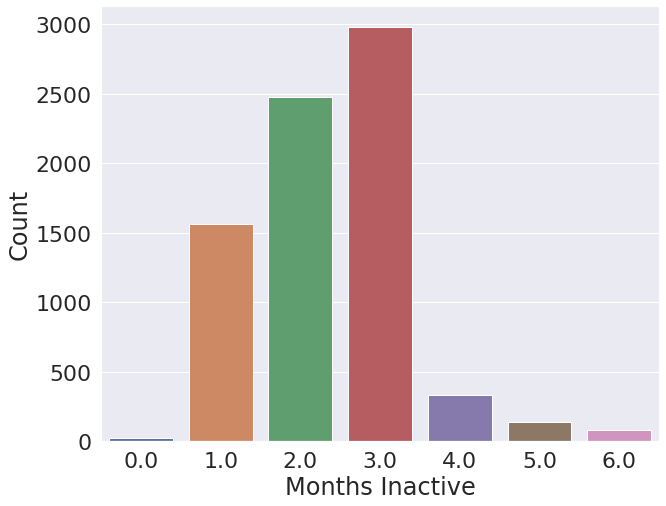

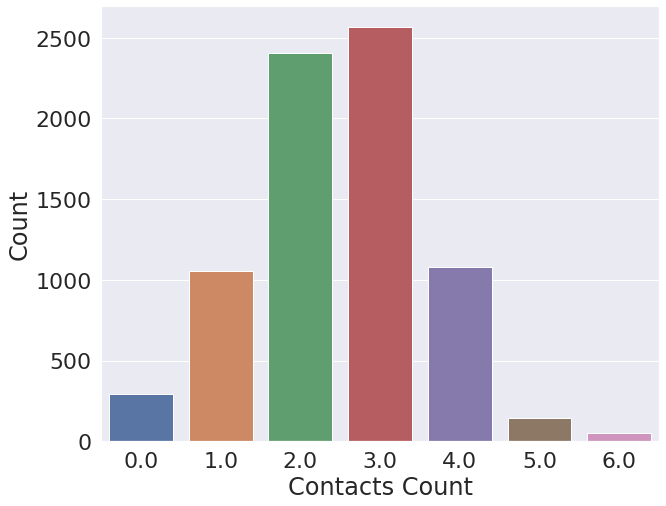

In [ ]:
sns.set(font_scale=2)
for col in numerical_small:
  plt.figure(figsize=(10,8))
  sns.countplot(knn_data[col])
  plt.ylabel('Count')
  plt.show();
  print()

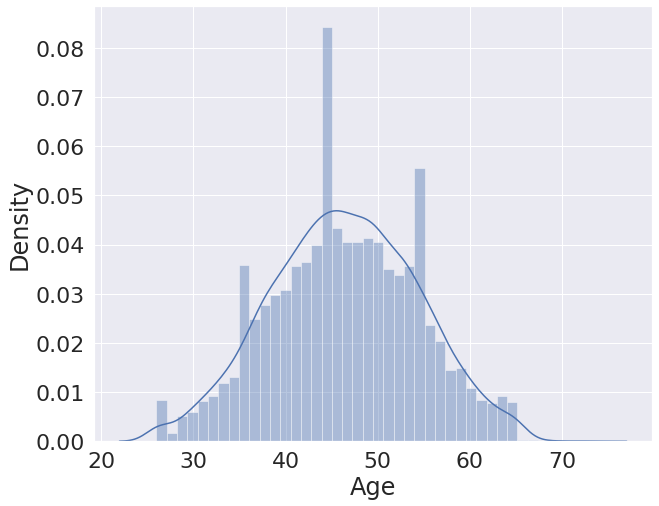

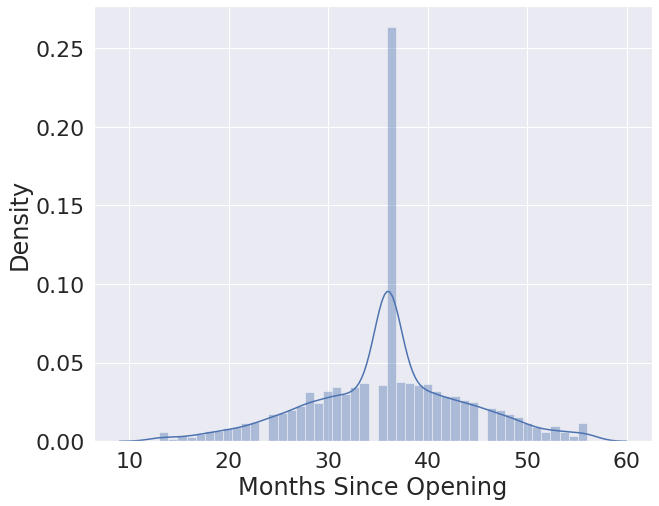

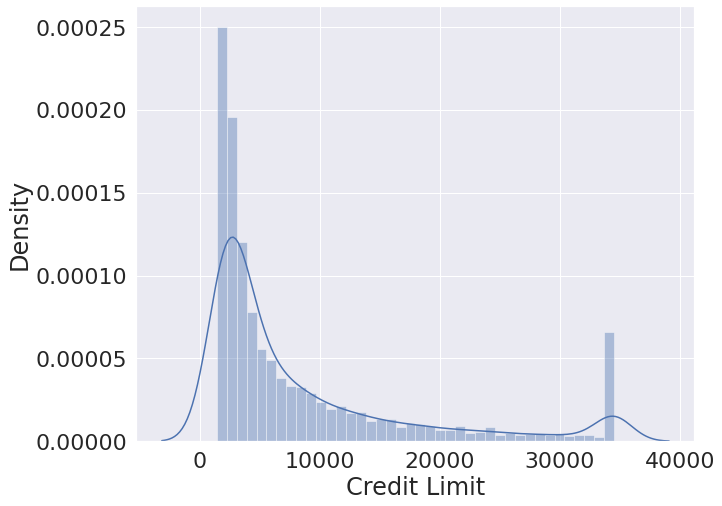

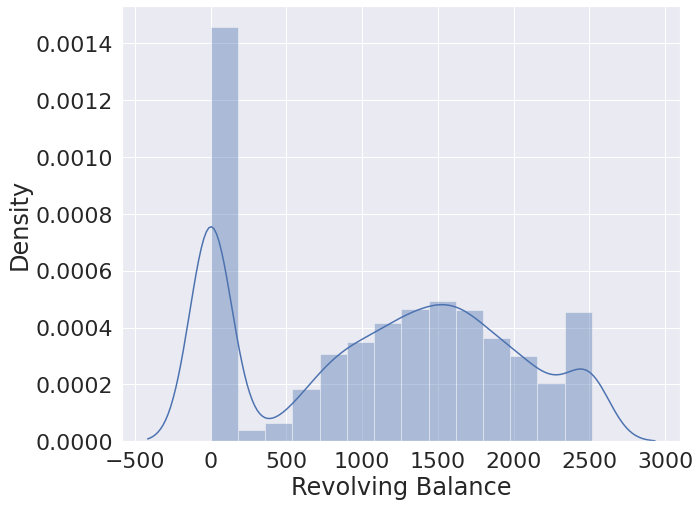

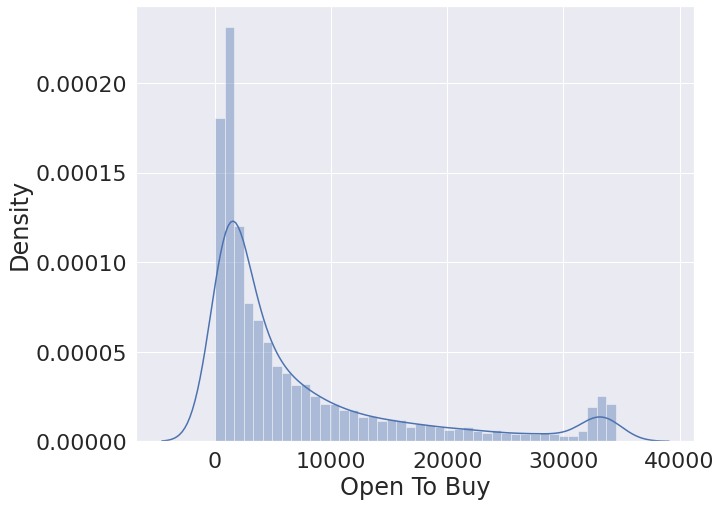

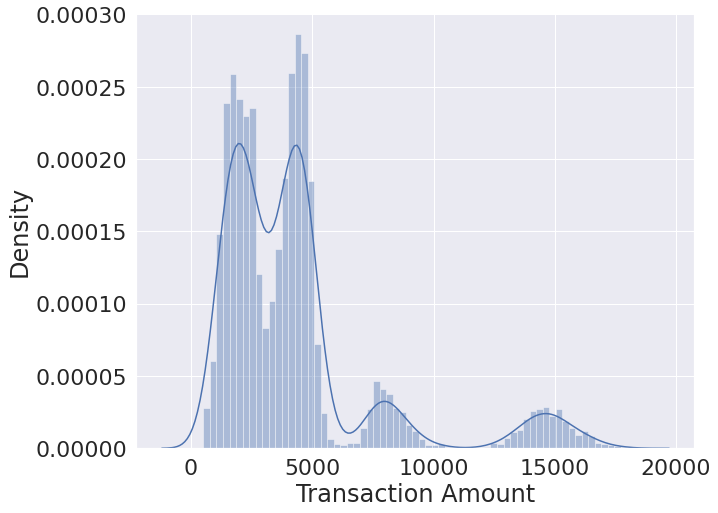

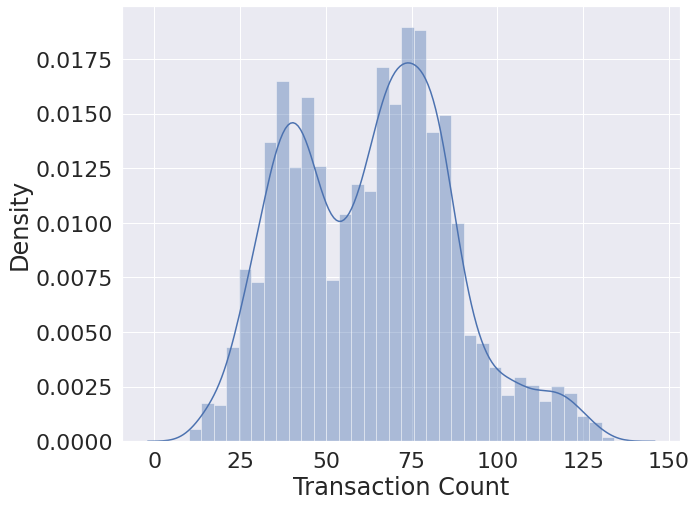

In [ ]:
for col in numerical_large:
  plt.figure(figsize=(10,8))
  sns.distplot(knn_data[col], bins='auto')
  plt.show();
  print()

<Figure size 720x576 with 0 Axes>

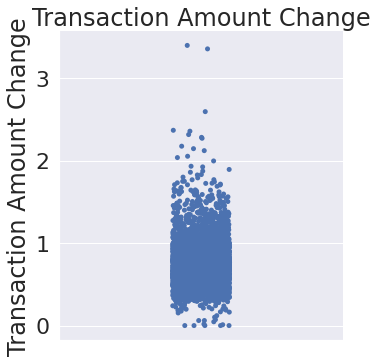

<Figure size 720x576 with 0 Axes>

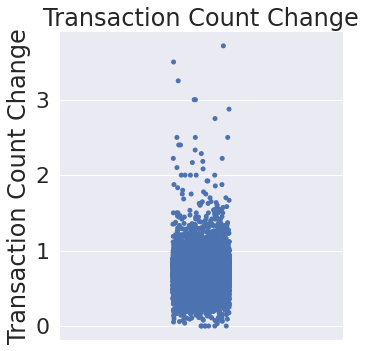

<Figure size 720x576 with 0 Axes>

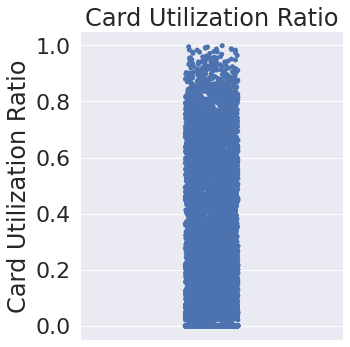

In [ ]:
for col in numerical_ratio:
  plt.figure(figsize=(10,8))
  sns.catplot(y=col, data=knn_data)
  plt.title(col)
  plt.show();
  print()

# Variable-Target Bivariate Analysis

### Numerical Variables

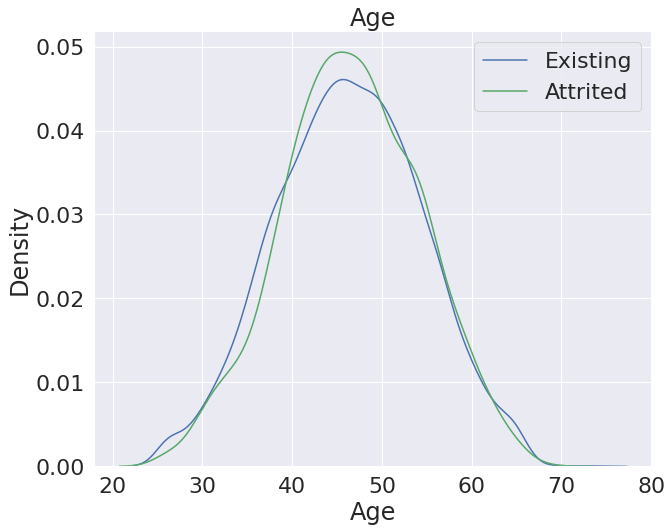

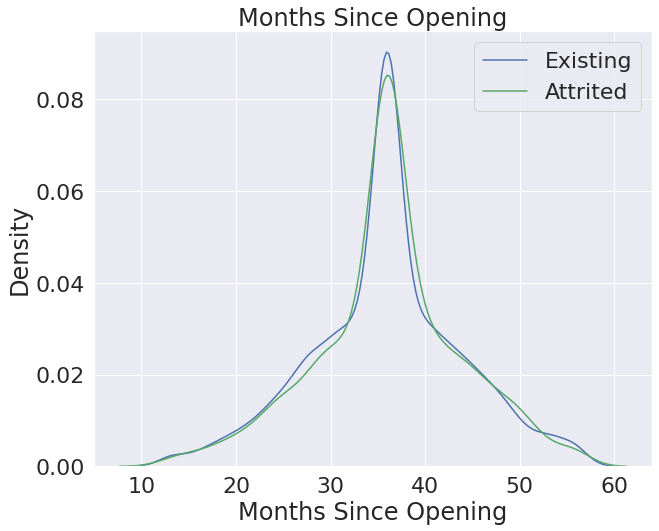

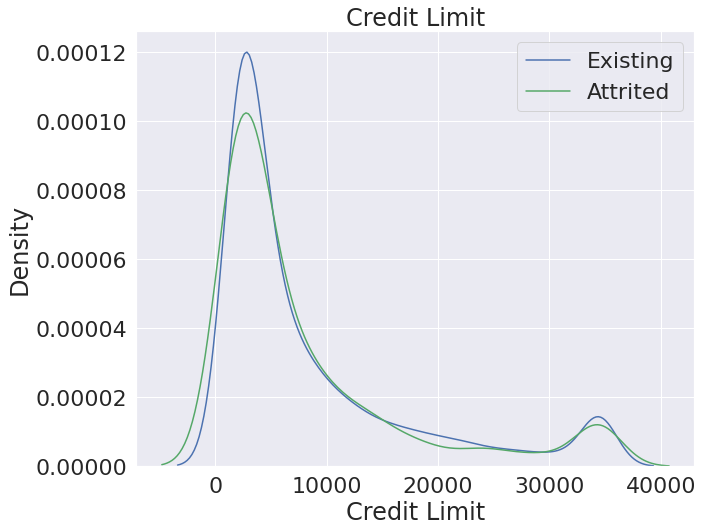

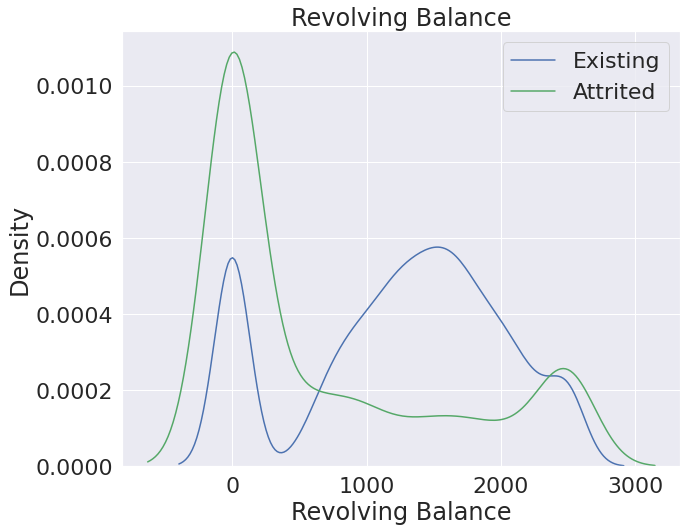

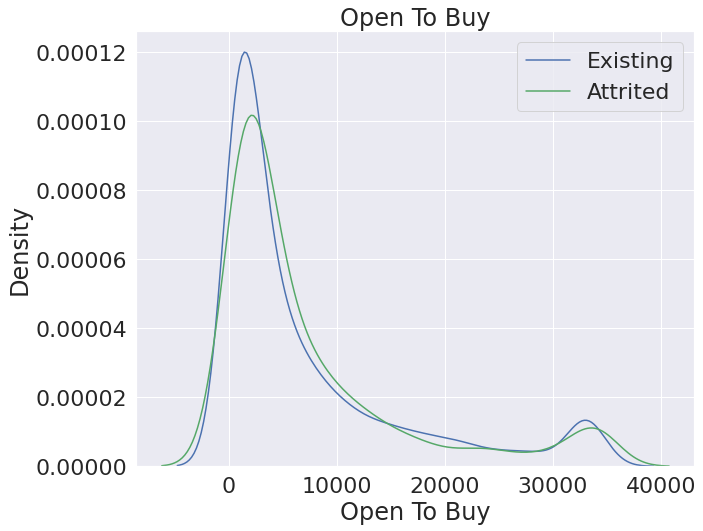

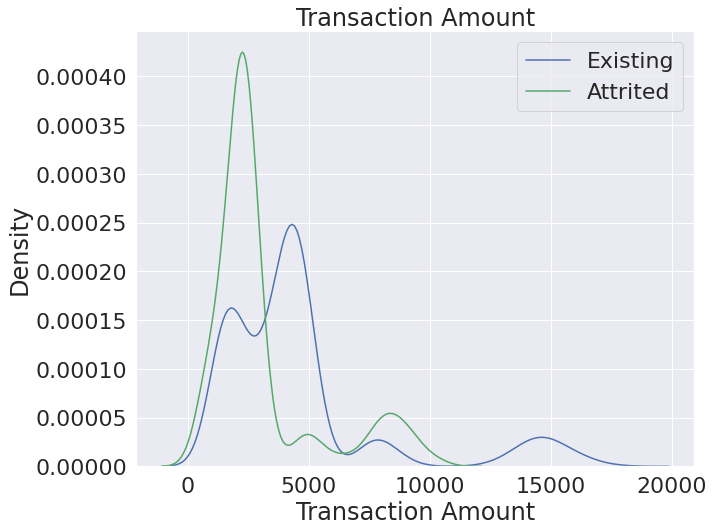

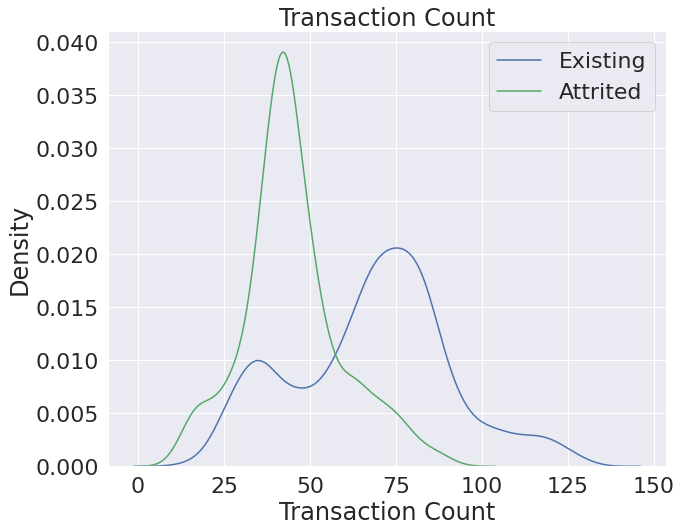

In [ ]:
target = knn_data['Status']

for col in numerical_large:

  plt.figure(figsize=(10,8))
  sns.distplot(knn_data[target == 0][col], bins = 'auto', color = 'b', label = 'Existing', hist=False)
  sns.distplot(knn_data[target == 1][col], bins = 'auto', color = 'g', label = 'Attrited', hist=False)
  plt.title(col)
  plt.legend()
  plt.show();
  print()

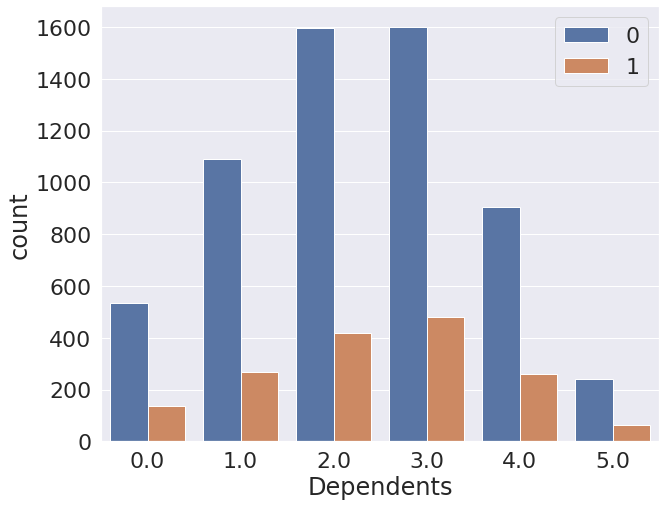

Dependents,0.0,1.0,2.0,3.0,4.0,5.0
Status,,,,,,
0,0.798507,0.80206,0.792744,0.768492,0.777015,0.79085
1,0.201493,0.19794,0.207256,0.231508,0.222985,0.20915


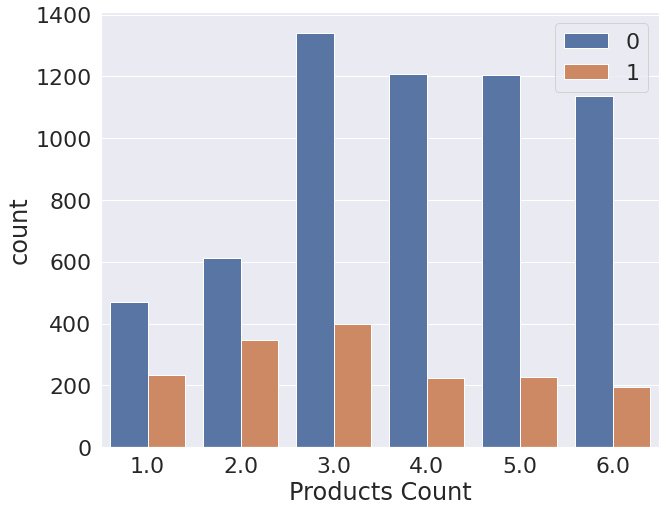

Products Count,1.0,2.0,3.0,4.0,5.0,6.0
Status,,,,,,
0,0.668091,0.638831,0.770115,0.843096,0.841259,0.852742
1,0.331909,0.361169,0.229885,0.156904,0.158741,0.147258


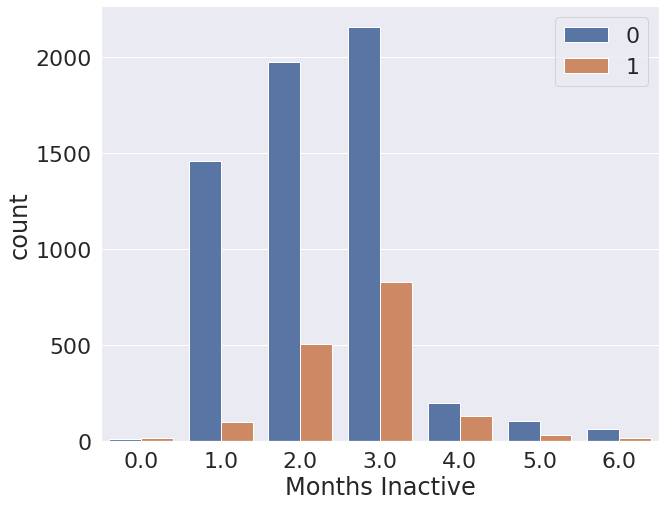

Months Inactive,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Status,,,,,,,
0,0.4,0.935897,0.796124,0.722819,0.607251,0.769784,0.771084
1,0.6,0.064103,0.203876,0.277181,0.392749,0.230216,0.228916


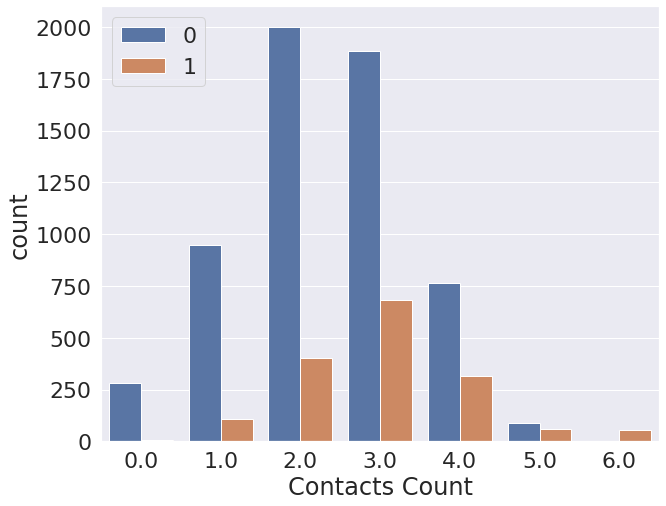

Contacts Count,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Status,,,,,,,
0,0.975862,0.897824,0.832293,0.734606,0.707792,0.598639,0.0
1,0.024138,0.102176,0.167707,0.265394,0.292208,0.401361,1.0


In [ ]:
for col in numerical_small:
  plt.figure(figsize=(10,8))
  sns.countplot(data=knn_data, x = col, hue = 'Status')
  plt.legend()
  plt.show();

  crosser = pd.crosstab(target, knn_data[col], normalize = 'columns')
  print()
  display(crosser)
  print()
  print()
  print()

<Figure size 720x576 with 0 Axes>

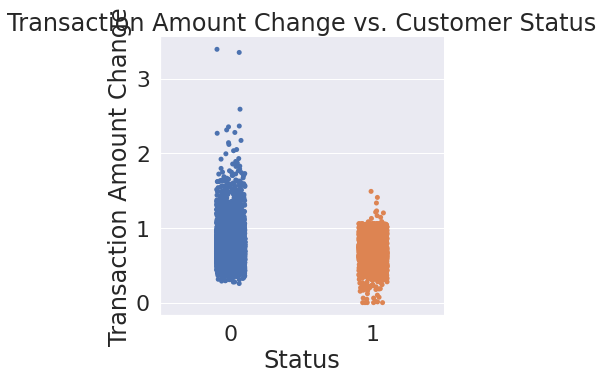

<Figure size 720x576 with 0 Axes>

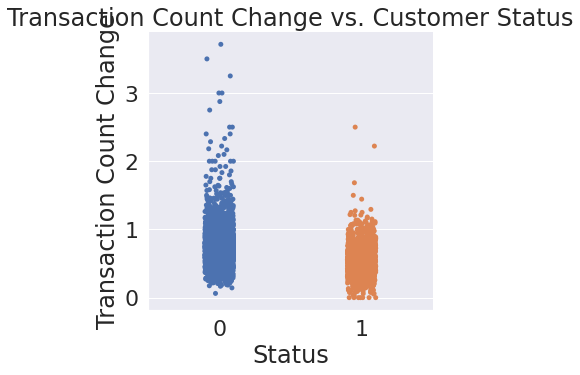

<Figure size 720x576 with 0 Axes>

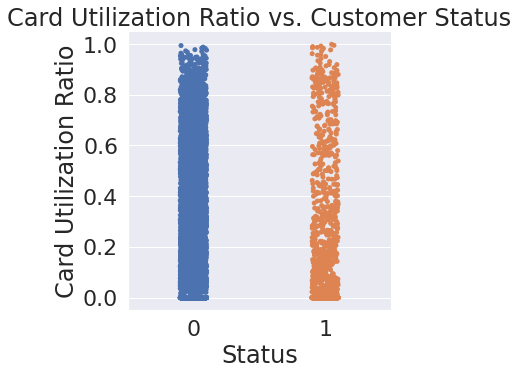

In [ ]:
for col in numerical_ratio:
  plt.figure(figsize=(10,8))
  sns.catplot(x="Status", y=col, order=[0,1], data=knn_data)
  plt.title(col + ' vs. Customer Status')
  plt.show();
  print()

### Categorical Variables

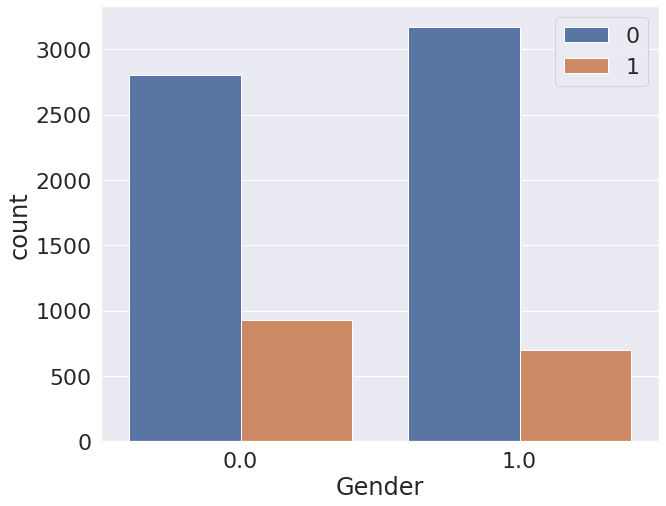

Gender,0.0,1.0
Status,,
0,0.750603,0.81971
1,0.249397,0.18029


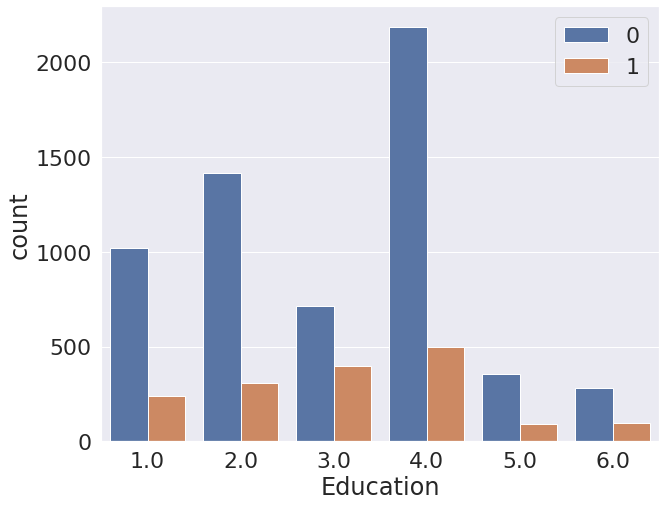

Education,1.0,2.0,3.0,4.0,5.0,6.0
Status,,,,,,
0,0.811155,0.821822,0.641441,0.814387,0.793722,0.748677
1,0.188845,0.178178,0.358559,0.185613,0.206278,0.251323


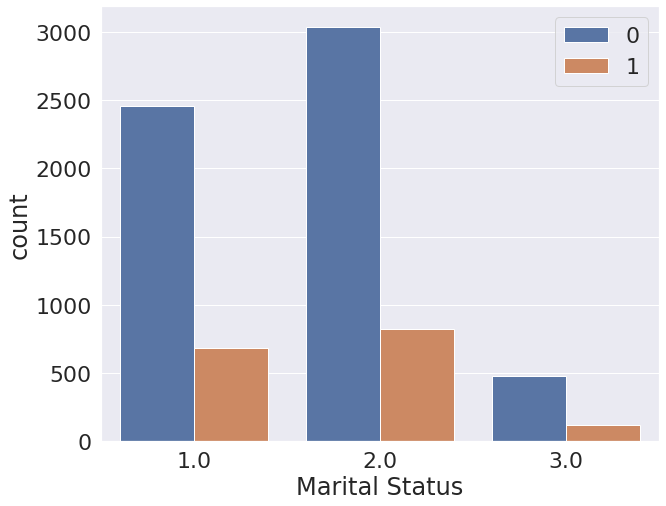

Marital Status,1.0,2.0,3.0
Status,,,
0,0.782914,0.786269,0.797659
1,0.217086,0.213731,0.202341


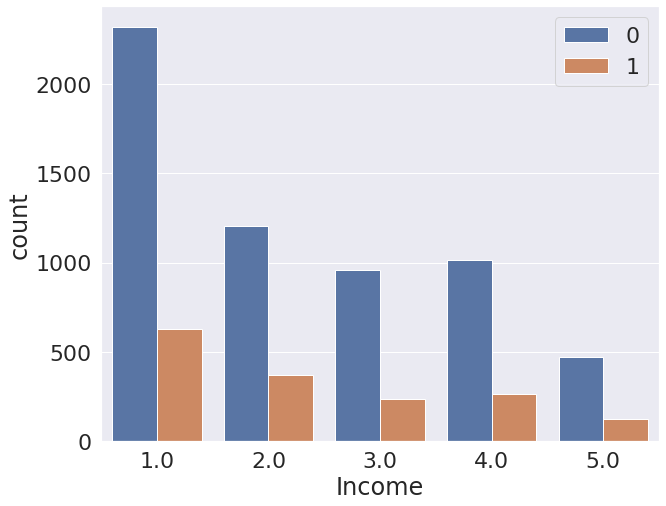

Income,1.0,2.0,3.0,4.0,5.0
Status,,,,,
0,0.786902,0.765526,0.801003,0.792645,0.788591
1,0.213098,0.234474,0.198997,0.207355,0.211409


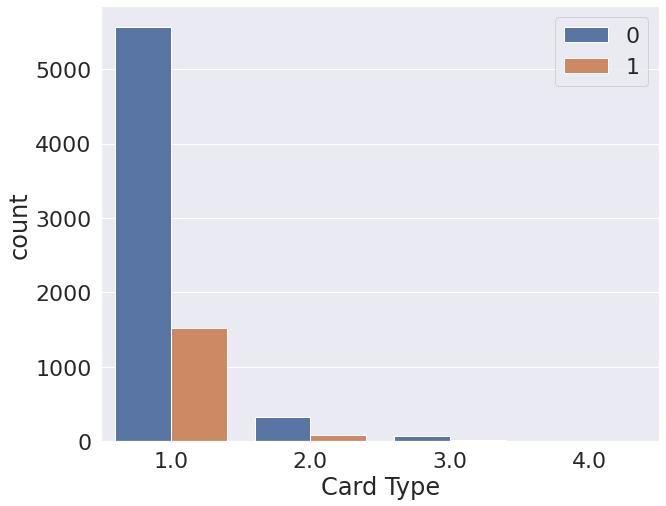

Card Type,1.0,2.0,3.0,4.0
Status,,,,
0,0.785543,0.8,0.764045,0.615385
1,0.214457,0.2,0.235955,0.384615


In [ ]:
categorical = knn_data[['Gender', 'Education', 'Marital Status', 'Income', 'Card Type']]

for col in categorical:
  plt.figure(figsize=(10,8))
  sns.countplot(data=knn_data, x = col, hue = 'Status')
  plt.legend()
  plt.show();

  crosser = pd.crosstab(target, knn_data[col], normalize = 'columns')
  print()
  display(crosser)
  print()
  print()
  print()

# Correlation

### Pairplots

In [ ]:
# sns.pairplot(knn_data, diag_kind='kde')

### Correlation Matrix

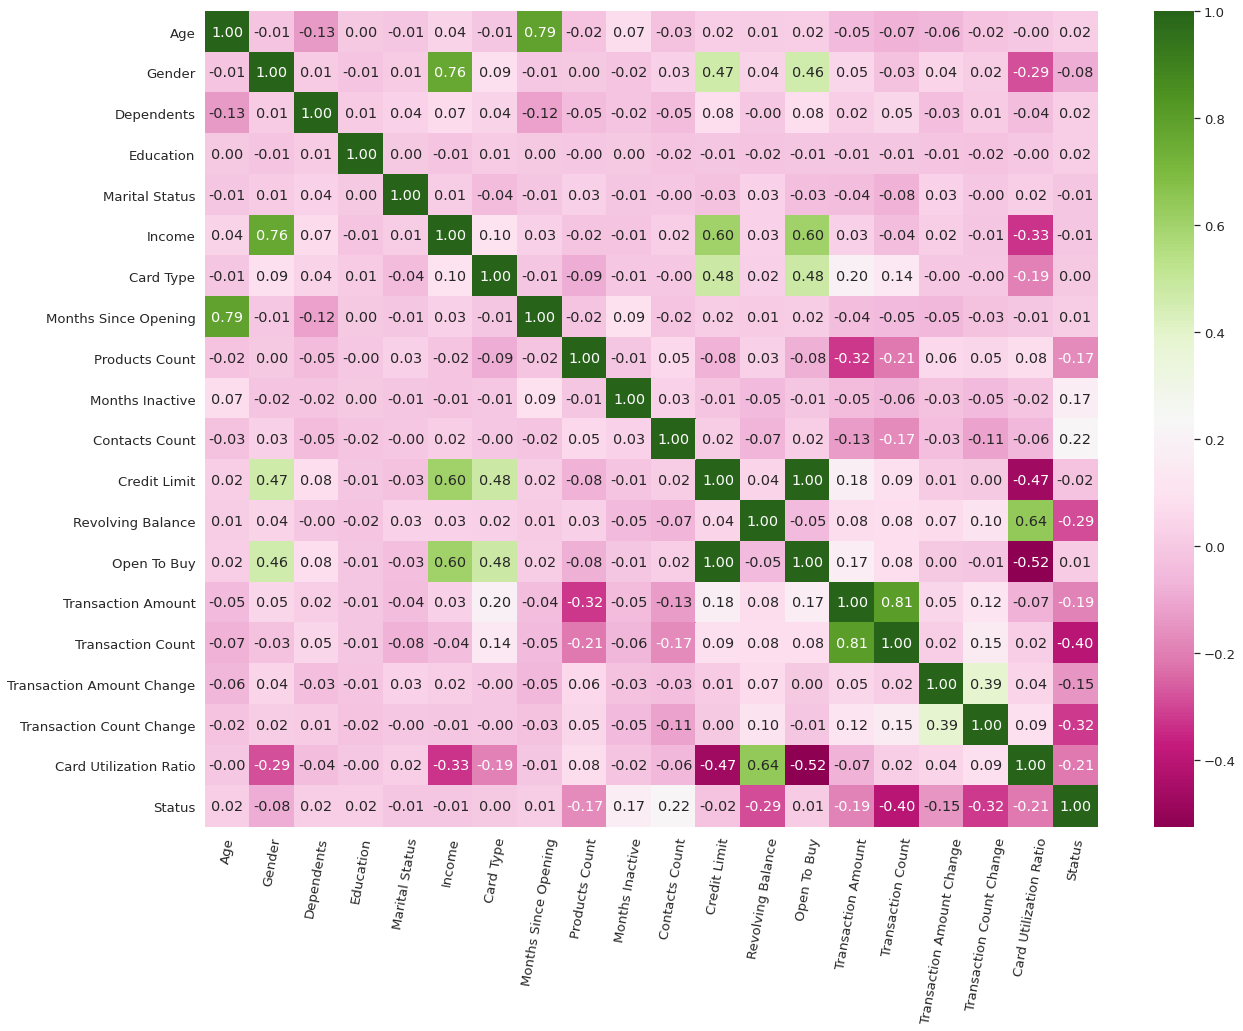

In [ ]:
plt.figure(figsize=(20,15))
sns.set(font_scale = 1.2)
sns.heatmap(knn_data.corr(), annot = True, fmt = '.2f', cmap = 'PiYG')
plt.xticks(rotation=80)
plt.show()

### Multicollinearity

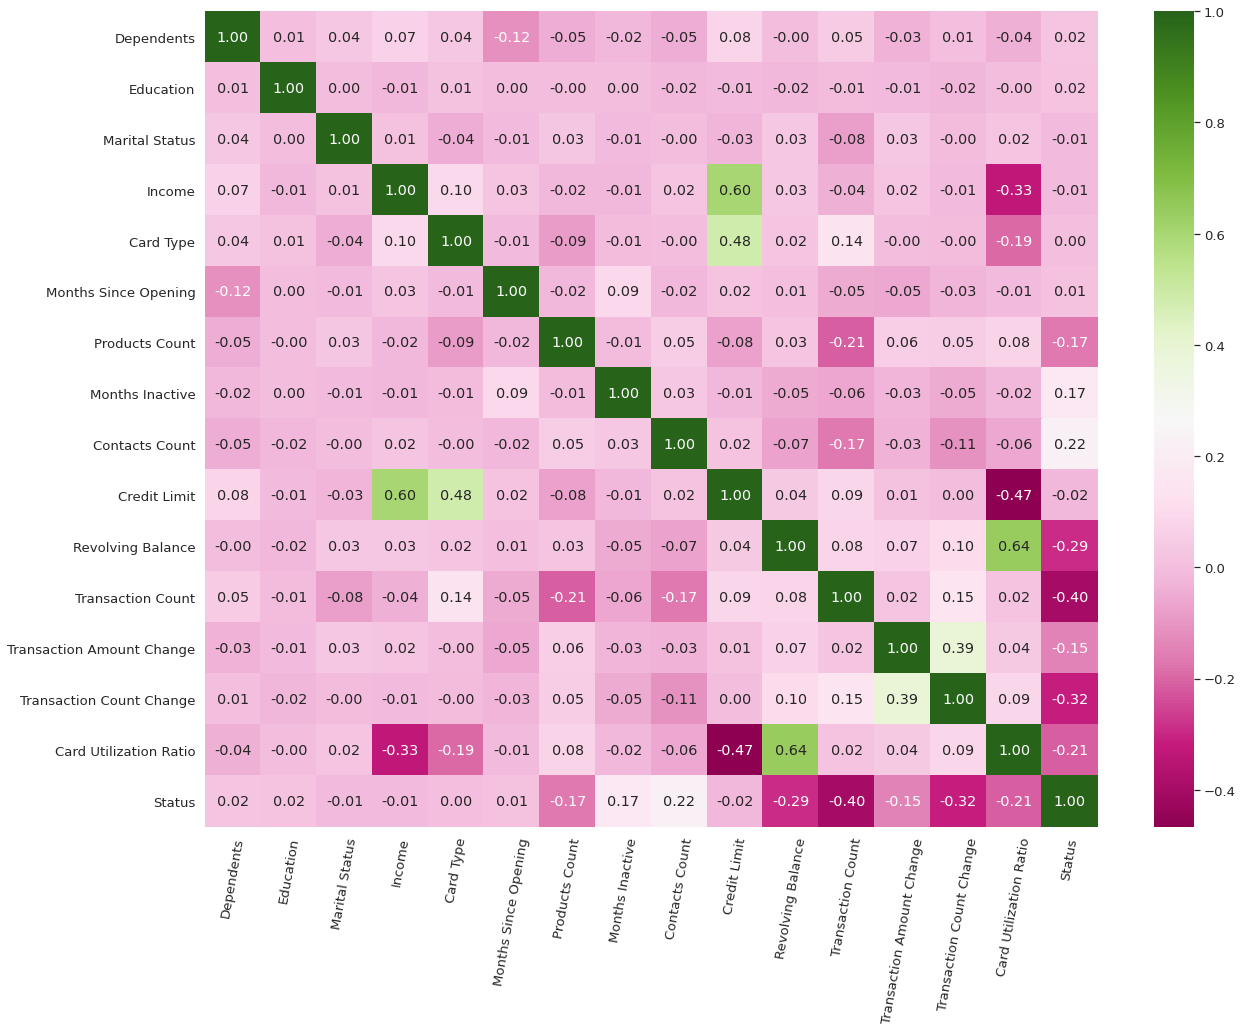

In [ ]:
mdata = knn_data.drop(['Age', 'Gender', 'Open To Buy', 'Transaction Amount'], axis=1)

plt.figure(figsize=(20,15))
sns.heatmap(mdata.corr(), annot = True, fmt = '.2f', cmap = 'PiYG')
plt.xticks(rotation=80)
plt.show()

We have dropped the obviously multicollinear variables from the dataset we will feed our model.

# Dataset Balancing

In [ ]:
mdata['Status'].value_counts()

0    5968
1    1627
Name: Status, dtype: int64

We have nearly 4 times as many Existing customers as we do Attrited customers. This is an imbalance that we'll try to correct with a mixture of oversampling and undersampling. To balance the advantages and disadvantages of each technique, we'll apply both to each respective subgroup.

If we halve our majority class (Existing customers) and double our minority class (Attrited customers), we'll achieve an approximately even number of customers from each class.

In [ ]:
attrited = mdata[knn_data['Status'] == 1]
attrited = pd.concat([attrited]*2)

attrited.shape

(3254, 16)

In [ ]:
existing = mdata[knn_data['Status'] == 0]
existing = existing.sample(frac = 0.5)

existing.shape

(2984, 16)

In [ ]:
mdata = attrited.append(existing, ignore_index=True)
mdata.shape

(6238, 16)

In [ ]:
mdata['Status'].value_counts(normalize=True)

1    0.521642
0    0.478358
Name: Status, dtype: float64

Our data is now much more balanced, and it is ready for modeling. We have named the dataset 'mdata'

# Splitting Data Into Train And Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

y = mdata['Status']
X = mdata.drop('Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4366, 15)
y_train: (4366,)
X_test: (1872, 15)
y_test: (1872,)


In [ ]:
print('Train Attrited Proportion:', y_train.sum() / len(y_train))
print('Test Attrited Proportion:', y_test.sum() / len(y_test))

Train Attrited Proportion: 0.5135135135135135
Test Attrited Proportion: 0.5405982905982906


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [ ]:
# A function to help us visualize our model's performance
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Default Parameters

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [ ]:
train_predict = log_reg.predict(X_train)

print('Training Accuracy:', log_reg.score(X_train, y_train))
print('Testing Accuracy:', log_reg.score(X_test, y_test))
print()
print('Training Recall:', recall_score(train_predict, y_train))
print('Testing Recall:', recall_score(y_test, y_pred))
print()
print('Training Precision:', precision_score(y_train, train_predict))
print('Testing Precision:', precision_score(y_test, y_pred))
print()
print('Training F1 Score:', f1_score(train_predict, y_train))
print('Testing F1 Score:', f1_score(y_test, y_pred))

Training Accuracy: 0.7954649564819056
Testing Accuracy: 0.7905982905982906

Training Recall: 0.7999110715873722
Testing Recall: 0.7816205533596838

Training Recall: 0.7999110715873722
Testing Precision: 0.8222453222453222

Training F1 Score: 0.8011578712981519
Testing F1 Score: 0.8014184397163121


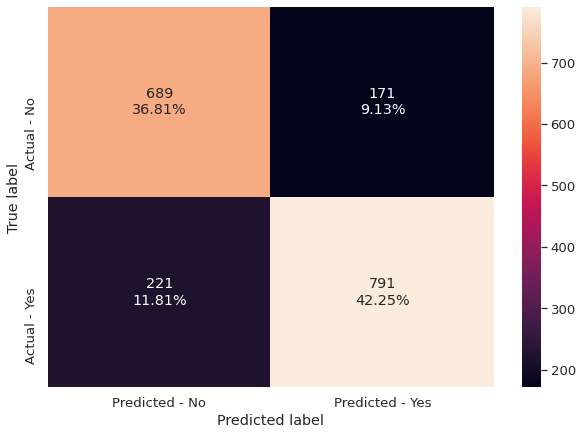

In [ ]:
make_confusion_matrix(log_reg, y_test)

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

In [ ]:
y_pred

array([0.23751149, 0.47246956, 0.85625905, ..., 0.23979555, 0.7196649 ,
       1.02828715])

In [ ]:
def converted(predictions):
  convert = []
  for pred in predictions:
    if pred < 0.5:
      convert.append(0)
    else:
      convert.append(1)
  return convert

In [ ]:
train_predict = converted(linear_reg.predict(X_train))

print('Training Accuracy:', accuracy_score(y_train, train_predict))
print('Testing Accuracy:', accuracy_score(y_test, converted(y_pred)))
print()
print('Training Recall:', recall_score(y_train, train_predict))
print('Testing Recall:', recall_score(y_test, converted(y_pred)))
print()
print('Training Precision:', precision_score(y_train, train_predict))
print('Testing Precision:', precision_score(y_test, converted(y_pred)))
print()
print('Training F1 Score:', f1_score(y_train, train_predict))
print('Testing F1 Score:', f1_score(y_test, converted(y_pred)))

Training Accuracy: 0.8245533669262483
Testing Accuracy: 0.8263888888888888

Training Recall: 0.8296164139161463
Testing Recall: 0.8181818181818182

Training Recall: 0.8288770053475936
Testing Precision: 0.8544891640866873

Training F1 Score: 0.8292465448060633
Testing F1 Score: 0.8359414437152952


In [ ]:
confusion_matrix(y_test, converted(y_pred))

array([[719, 141],
       [184, 828]])

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Default Parameters

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
train_predict = dtree.predict(X_train)

print('Training Accuracy:', dtree.score(X_train, y_train))
print('Testing Accuracy:', dtree.score(X_test, y_test))
print()
print('Training Recall:', recall_score(y_train, train_predict))
print('Testing Recall:', recall_score(y_test, y_pred))
print()
print('Training Recall:', metrics.recall_score(y_train, train_predict))
print('Testing Precision:', precision_score(y_test, y_pred))
print()
print('Training F1 Score:', f1_score(y_train, train_predict))
print('Testing F1 Score:', f1_score(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9001068376068376

Training Recall: 1.0
Testing Recall: 0.9545454545454546

Training Recall: 1.0
Testing Precision: 0.8726287262872628

Training F1 Score: 1.0
Testing F1 Score: 0.9117508258612553


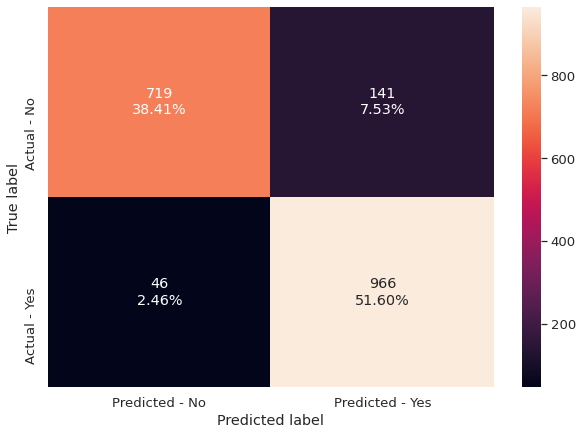

In [ ]:
make_confusion_matrix(dtree, y_test)

Our model is overfitting, so let's try tuning some hyperparameters to the Decision Tree from growing too large.

### Tuning

In [ ]:
dtree_tuned = DecisionTreeClassifier(criterion = 'gini',
                                     max_depth = 7,
                                     max_features = 0.9,
                                     max_leaf_nodes = 100,
                                     min_impurity_decrease = 0.00001)
dtree_tuned.fit(X_train, y_train)

y_pred = dtree_tuned.predict(X_test)
train_predict = dtree_tuned.predict(X_train)

print('Training Accuracy:', dtree_tuned.score(X_train, y_train))
print('Testing Accuracy:', dtree_tuned.score(X_test, y_test))
print()
print('Training Recall:', recall_score(y_train, train_predict))
print('Testing Recall:', recall_score(y_test, y_pred))
print()
print('Training Precision:', precision_score(y_train, train_predict))
print('Testing Precision:', precision_score(y_test, y_pred))
print()
print('Training F1 Score:', f1_score(y_train, train_predict))
print('Testing F1 Score:', f1_score(y_test, y_pred))

Training Accuracy: 0.9005955107650023
Testing Accuracy: 0.8771367521367521

Training Recall: 0.9482604817127565
Testing Recall: 0.932806324110672

Training Precision: 0.869885433715221
Testing Precision: 0.8535262206148282

Training F1 Score: 0.9073836961160905
Testing F1 Score: 0.8914069877242683


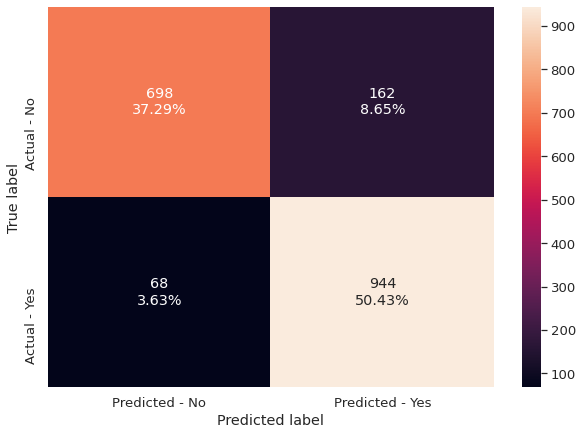

In [ ]:
make_confusion_matrix(dtree_tuned, y_test)

# Model Comparison

# Business Insights